### 3.5.4 An end-to-end example: A linear classifier in pure TensorFlow

In [1]:
import numpy as np, tensorflow as tf

In [2]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [3]:
negative_samples

array([[ 0.10312097,  3.22697751],
       [-0.4152871 ,  2.12727342],
       [ 0.48776174,  5.60972482],
       ...,
       [ 1.72502932,  3.75645602],
       [ 0.7844472 ,  4.40541366],
       [-0.8680477 ,  4.24136319]])

In [4]:
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [5]:
positive_samples

array([[ 2.7361707 , -0.2867695 ],
       [ 5.20836814,  3.53375183],
       [ 3.46189432,  0.34581267],
       ...,
       [ 4.22815407, -0.32303832],
       [ 0.98745233, -0.55595786],
       [ 2.23255993,  0.60063277]])

In [6]:
positive_samples.min(), negative_samples.min()

(-3.7289472255946374, -2.881567302617114)

In [7]:
positive_samples.max(), negative_samples.max()

(6.226414584436279, 6.53125781697169)

In [8]:
from matplotlib import pyplot as plt

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

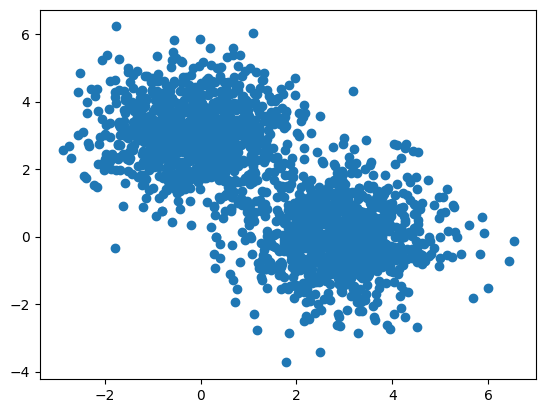

In [10]:
plt.scatter(negative_samples, positive_samples);
# plt.show()

In [11]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [12]:
inputs

array([[ 0.10312097,  3.2269776 ],
       [-0.4152871 ,  2.1272733 ],
       [ 0.48776174,  5.609725  ],
       ...,
       [ 4.228154  , -0.3230383 ],
       [ 0.9874523 , -0.55595785],
       [ 2.23256   ,  0.6006328 ]], dtype=float32)

In [13]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
    np.ones((num_samples_per_class, 1), dtype="float32")))

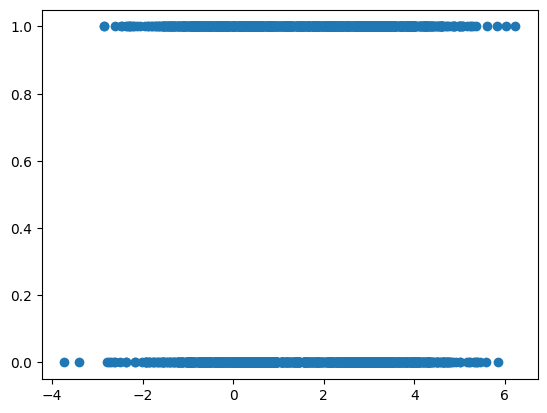

In [14]:
plt.scatter(positive_samples, targets)

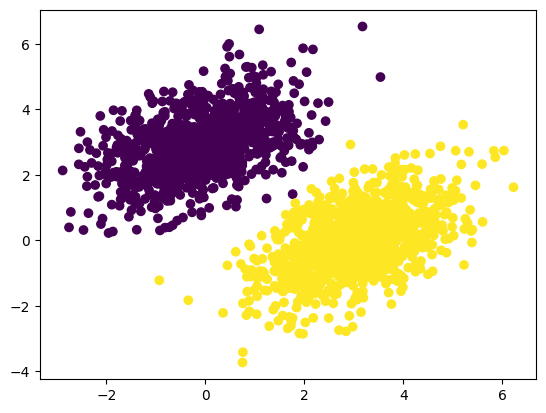

In [15]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

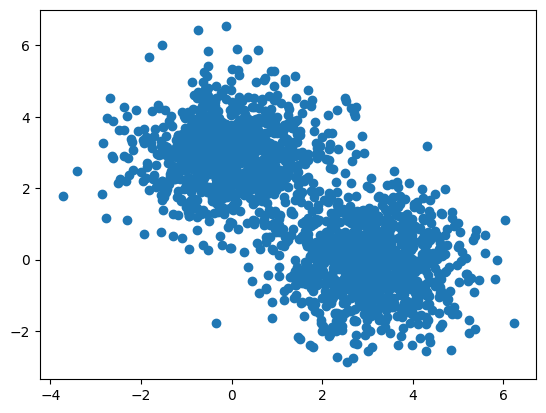

In [16]:
plt.scatter(positive_samples, negative_samples);

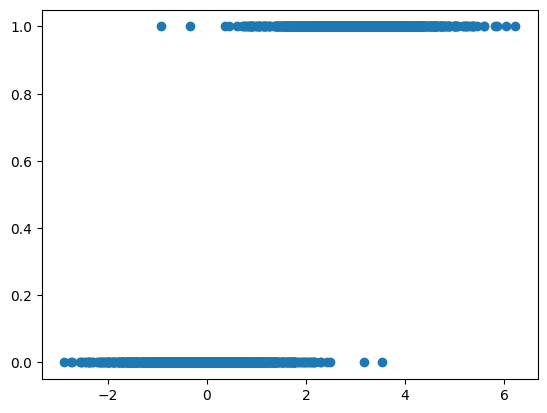

In [17]:
plt.scatter(inputs[:, 0], targets)

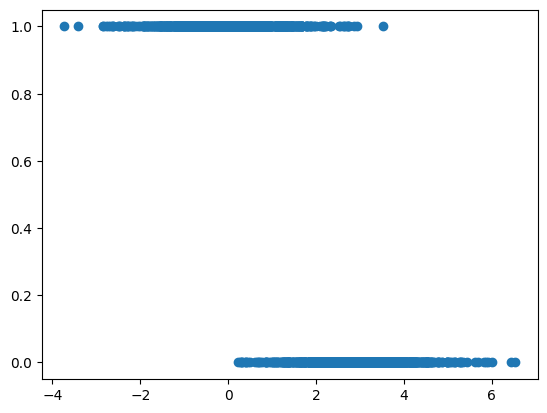

In [18]:
plt.scatter(inputs[:, 1], targets)

In [19]:
min(positive_samples.min(), negative_samples.min())

-3.7289472255946374

In [20]:
inputs.min()

-3.7289472

In [21]:
positive_samples.mean()

1.5144702963746617

In [22]:
negative_samples.mean()

1.4288769633748566

In [23]:
(1.4882733657814597 + 1.430962945141545)/2

1.4596181554615024

In [24]:
inputs.mean()

1.4716736

In [25]:
positive_samples.shape, negative_samples.shape, inputs.shape, targets.shape

((1000, 2), (1000, 2), (2000, 2), (2000, 1))

In [26]:
targets[:, 0]

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [27]:
targets[:1001, 0]

array([0., 0., 0., ..., 0., 0., 1.], dtype=float32)

In [28]:
inputs

array([[ 0.10312097,  3.2269776 ],
       [-0.4152871 ,  2.1272733 ],
       [ 0.48776174,  5.609725  ],
       ...,
       [ 4.228154  , -0.3230383 ],
       [ 0.9874523 , -0.55595785],
       [ 2.23256   ,  0.6006328 ]], dtype=float32)

In [29]:
inputs[0, ]

array([0.10312097, 3.2269776 ], dtype=float32)

In [30]:
inputs[1, ]

array([-0.4152871,  2.1272733], dtype=float32)

In [31]:
positive_samples[:, 0].mean()

3.041774442107112

In [32]:
positive_samples[:, 1].mean()

-0.012833849357788248

In [33]:
negative_samples[:, 0].mean()

-0.07788982770941394

In [34]:
negative_samples[:, 1].mean()

2.9356437544591274

In [35]:
(positive_samples[:, 0].mean() + positive_samples[:, 1].mean())/2

1.514470296374662

In [36]:
positive_samples.mean()

1.5144702963746617

In [37]:
input_dim = 2
output_dim = 1

In [38]:
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [39]:
print(W)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.05626297],
       [0.3027879 ]], dtype=float32)>


In [40]:
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [41]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [42]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [43]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [44]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.8467
Loss at step 1: 0.0867
Loss at step 2: 0.0808
Loss at step 3: 0.0759
Loss at step 4: 0.0714
Loss at step 5: 0.0674
Loss at step 6: 0.0636
Loss at step 7: 0.0602
Loss at step 8: 0.0571
Loss at step 9: 0.0543
Loss at step 10: 0.0517
Loss at step 11: 0.0493
Loss at step 12: 0.0471
Loss at step 13: 0.0452
Loss at step 14: 0.0434
Loss at step 15: 0.0417
Loss at step 16: 0.0402
Loss at step 17: 0.0388
Loss at step 18: 0.0376
Loss at step 19: 0.0364
Loss at step 20: 0.0354
Loss at step 21: 0.0344
Loss at step 22: 0.0335
Loss at step 23: 0.0327
Loss at step 24: 0.0320
Loss at step 25: 0.0313
Loss at step 26: 0.0307
Loss at step 27: 0.0302
Loss at step 28: 0.0297
Loss at step 29: 0.0292
Loss at step 30: 0.0288
Loss at step 31: 0.0284
Loss at step 32: 0.0280
Loss at step 33: 0.0277
Loss at step 34: 0.0274
Loss at step 35: 0.0272
Loss at step 36: 0.0269
Loss at step 37: 0.0267
Loss at step 38: 0.0265
Loss at step 39: 0.0263


In [45]:
W, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 0.17201851],
        [-0.12431455]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.40803397], dtype=float32)>)

In [46]:
predictions = model(inputs)

In [47]:
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.0246124 ],
       [ 0.07214588],
       [-0.20543242],
       ...,
       [ 1.1755131 ],
       [ 0.6470077 ],
       [ 0.7174082 ]], dtype=float32)>

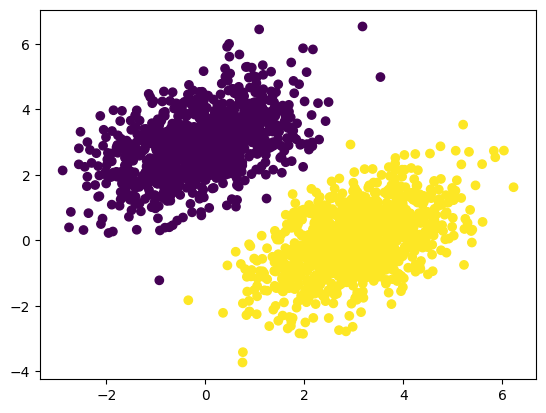

In [48]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [49]:
# w1 * x + w2 * y + b < 0.5 # class is 0
# w1 * x + w2 * y + b > 0.5 # class is 1
# Our line equation is
# w1 * x + w2 * y + b = 0.5
# w1 * x + w2 * y = 0.5 - b
# w2 * y = (0.5 - b) - w1 * x
# y = - w1/w2 * x + (0.5 - b)/w2

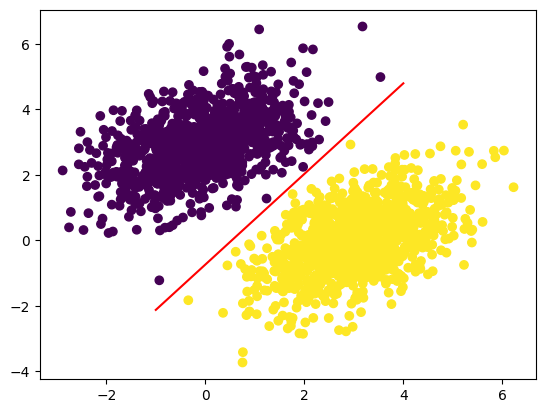

In [50]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r") # -r means plot it as a red line
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5);

In [51]:
inputs.shape

(2000, 2)

In [52]:
inputs[0, ]

array([0.10312097, 3.2269776 ], dtype=float32)

In [53]:
inputs[0, :].shape

(2,)

In [54]:
inputs[0, ]

array([0.10312097, 3.2269776 ], dtype=float32)

In [55]:
inputs[0, :].shape

(2,)

In [56]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.17201851],
       [-0.12431455]], dtype=float32)>

In [57]:
W.shape

TensorShape([2, 1])

In [58]:
print(W[0])

tf.Tensor([0.17201851], shape=(1,), dtype=float32)


In [59]:
print(W[1])

tf.Tensor([-0.12431455], shape=(1,), dtype=float32)


In [60]:
print(W, b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.17201851],
       [-0.12431455]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.40803397], dtype=float32)>


In [61]:
tf.matmul(inputs, W)

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[-0.38342157],
       [-0.3358881 ],
       [-0.6134664 ],
       ...,
       [ 0.7674792 ],
       [ 0.23897374],
       [ 0.30937424]], dtype=float32)>

In [62]:
tf.matmul(inputs, W) + b

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.0246124 ],
       [ 0.07214588],
       [-0.20543242],
       ...,
       [ 1.1755131 ],
       [ 0.6470077 ],
       [ 0.7174082 ]], dtype=float32)>

In [63]:
[tf.matmul(inputs, W) + b][0]

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[ 0.0246124 ],
       [ 0.07214588],
       [-0.20543242],
       ...,
       [ 1.1755131 ],
       [ 0.6470077 ],
       [ 0.7174082 ]], dtype=float32)>

In [64]:
inputs.shape

(2000, 2)

In [65]:
targets[0]

array([0.], dtype=float32)